<a href="https://colab.research.google.com/github/markvasin/deep_learning_exercise/blob/master/optimisation/optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Optimisation

We want to explore the path different first-order gradient based solvers take in minimising a function. Let's import some libraries that we'll use and define a function to optimise:

In [ ]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD, RMSprop, Adam

# initial=[[2],[0]]
initial=[[2],[-0.5]]

def function(x):
    return x[0]**2 + x[1]**2 + x[0]*x[1]

We'll now optimise the function and store the path, using a range of pytorch's internal optimisers. Try some different learning rates to see what happens: 

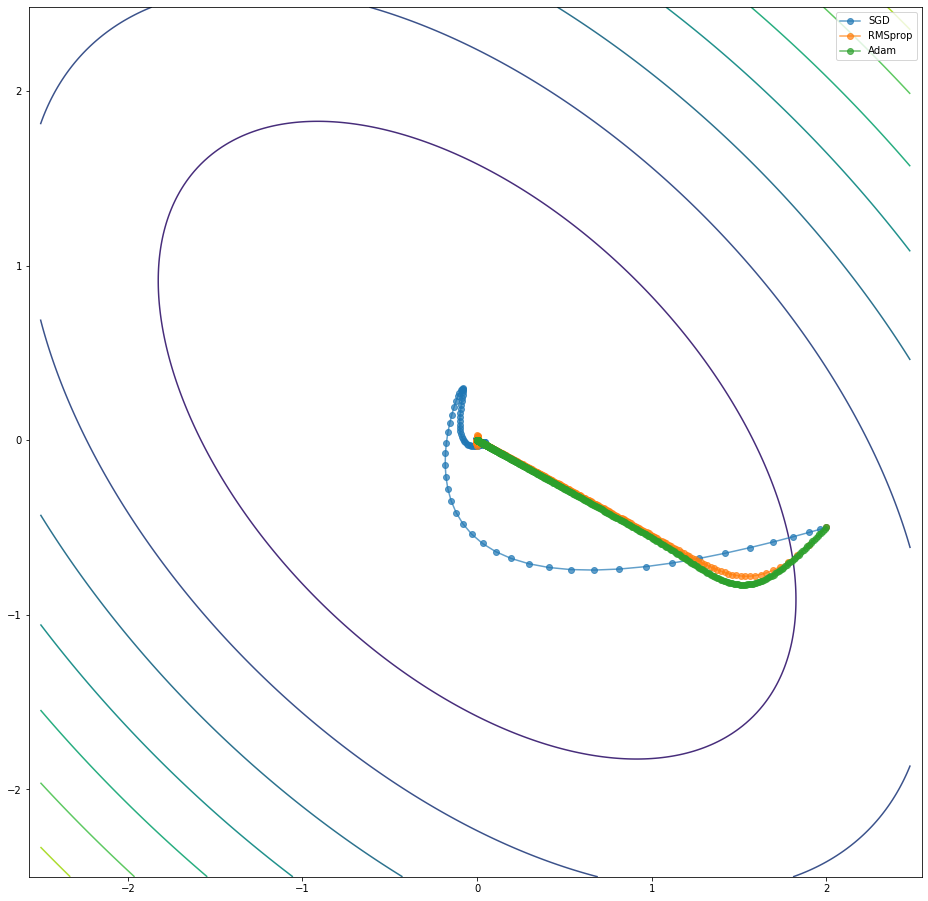

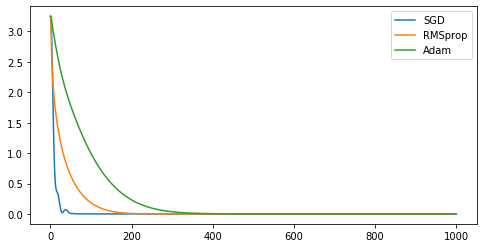

In [ ]:
path=dict()
error=dict()

lr = 0.01

# iterate over different optimisers, and record the path taken by each
for op in [SGD, RMSprop, Adam]:
    x = torch.tensor(initial, requires_grad=True, dtype=torch.float)
    name = op.__name__

    if (op != SGD):
      optim = op([x], lr=lr)
    else:
      optim = SGD([x], lr=lr, momentum=0.9)

    path[name] = np.empty((2,0))
    path[name] = np.append(path[name], x.data.numpy(), axis=1)
    error[name] = np.empty((0))
    error[name] = np.append(error[name], function(x).data.numpy())
    for i in range(0,1000):
        optim.zero_grad()
        output = function(x)
        output.backward()
        optim.step()

        path[name] = np.append(path[name], x.data.numpy(), axis=1)
        error[name] = np.append(error[name], output.data.numpy())

x = np.arange(-2.5,2.5,0.02)
y = np.arange(-2.5,2.5,0.02)

X,Y= np.meshgrid(x,y)
Z = function([X,Y])

plt.figure(figsize=(16,16))
plt.axis('equal')
plt.contour(X,Y,Z)
for key in path.keys():
    if key == 'raw_sgd':
        plt.plot(path[key][0], path[key][1], '-o', label=key, linestyle=':')
    else:
        plt.plot(path[key][0], path[key][1], '-o', label=key, alpha=0.7)
    plt.legend()

plt.show()

plt.figure(figsize=(8,4))
for key in path.keys():
    plt.plot(np.arange(0,error[key].shape[0]), error[key], label=key)
    plt.legend()
plt.show()

Adam isn't rotationally invariant - see what happens when starting in different initial points:

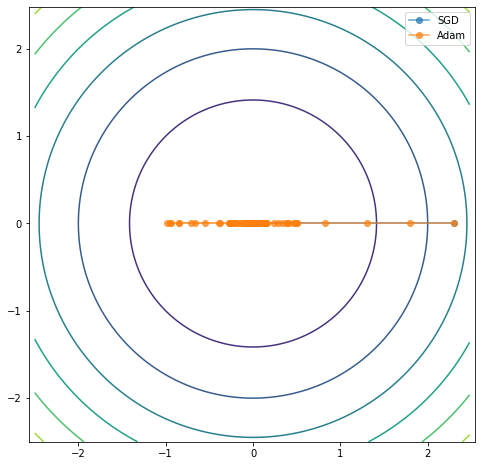

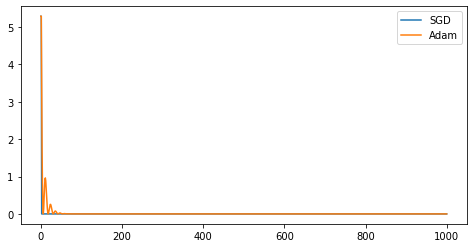

In [ ]:
initial=[[2.3],[0]]
# initial=[[1],[2]]

def function(x):
    return x[0]**2 + x[1]**2

path=dict()
error=dict()

lr=.5

# iterate over different optimisers, and record the path taken by each
for op in [SGD, Adam]:
    x = torch.tensor(initial, requires_grad=True, dtype=torch.float)
    name = op.__name__

    optim = op([x], lr=lr)

    path[name] = np.empty((2,0))
    path[name] = np.append(path[name], x.data.numpy(), axis=1)
    error[name] = np.empty((0))
    error[name] = np.append(error[name], function(x).data.numpy())
    for i in range(0,1000):
        optim.zero_grad()
        output = function(x)
        output.backward()
        optim.step()

        path[name] = np.append(path[name], x.data.numpy(), axis=1)
        error[name] = np.append(error[name], output.data.numpy())

x = np.arange(-2.5,2.5,0.02)
y = np.arange(-2.5,2.5,0.02)

X,Y= np.meshgrid(x,y)
Z = function([X,Y])

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.contour(X,Y,Z)
for key in path.keys():
    if key == 'raw_sgd':
        plt.plot(path[key][0], path[key][1], '-o', label=key, linestyle=':')
    else:
        plt.plot(path[key][0], path[key][1], '-o', label=key, alpha=0.7)
    plt.legend()

plt.show()

plt.figure(figsize=(8,4))
for key in path.keys():
    plt.plot(np.arange(0,error[key].shape[0]), error[key], label=key)
    plt.legend()
plt.show()